## 1. matplotlib basics


* Run **`import matplotlib.pyplot as plt`**
* Create a figure object using **`plt.figure`**
* Add subplots to it using **`add_subplot`**
    * This creates **AxesSubplot** objects on which you can place plots
* Use a plotting command like **`plt.plot`** and matplotlib will place your plot on this canvas


### 1.1 Figure, Subplots, AxisSubplot objects and your plot

#### Create a 2x2 figure and add three plots to it

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from numpy.random import randn, randint, uniform, sample

In [3]:
x = np.arange(30)

In [4]:
y = 5 * np.arange(30) + 8 * np.random.randn(30)

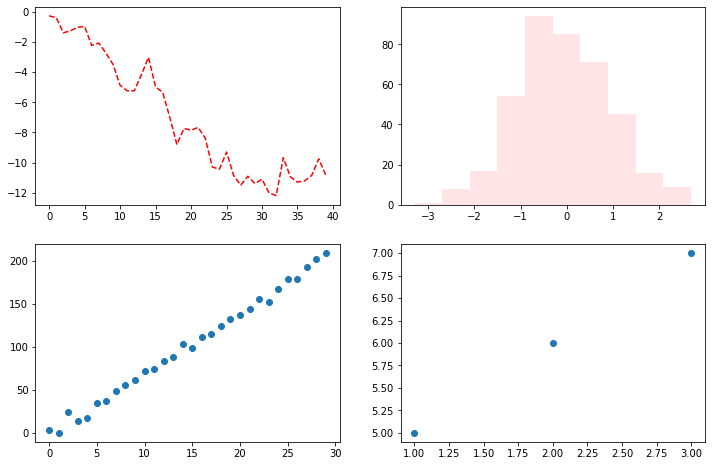

In [6]:
# Create an empty figure
fig = plt.figure(figsize=(12, 8))

# Run plt.figure? to check out figure options like size, dpi, color

axsp1 = fig.add_subplot(2, 2, 1)
# There will be 2 x 2 subplots on the figure and ax1 will put your figure on subplot 1

axsp2 = fig.add_subplot(2, 2, 2)
axsp3 = fig.add_subplot(2, 2, 3)
axsp4 = fig.add_subplot(2, 2, 4)
# Now, we have three AxesSubplot objects on our figure. 

# First plot: timeseries
axsp1.plot(np.random.randn(40).cumsum(), 'r--')

# Second plot: histogram
axsp2.hist(np.random.randn(400), bins=10, color='r', alpha=0.1)

# Third plot: scatterplot
axsp3.scatter(np.arange(30), 7 * np.arange(30) + 5 * np.random.randn(30))
axsp4.scatter([1,2,3],[5,6,7])


# Note: if you make changes to the AxisSubplot object, you'll have to re-run the commands above

# 2. Plotting in `pandas`

* There are high level plotting methods that take advantage of the fact that data are organized in DataFrames (have index, colnames)
* Both `Series` and `DataFrame` objects have a `pandas.plot` method for making different plot types
* Other parameters that can be passed to `pandas.plot` are:
    * `xticks, xlim, yticks, ylim`
    * `label`
    * `style` (as an abbreviation,) and `alpha`
    * `grid=True`
    * `rot` (rotate tick labels by and angle 0-360)
    * `use_index` (use index for tick labels)

### 2.1 One variable (plotting a Series)

In [7]:
np.array([1,2,3,4]).cumsum()

array([ 1,  3,  6, 10])

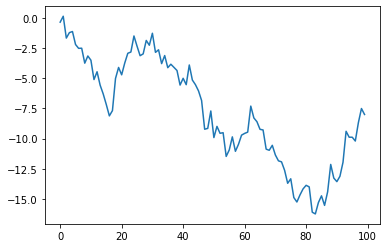

In [8]:
s = pd.Series(np.random.randn(100).cumsum())

s.plot();
# Default is a line chart

## A. Histograms

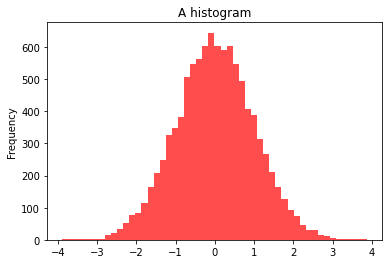

In [10]:
# One Variable as a Histogram
pd.Series(np.random.randn(10000)).plot(kind='hist', 
                                    bins=50, 
                                    color='r', 
                                    alpha=0.7, 
                                    title='A histogram');

In [11]:
np.random.randint(0,10)

5

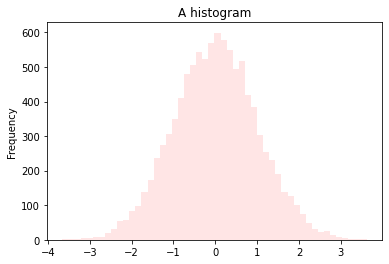

In [ ]:
# One Variable as a Histogram
pd.Series(np.random.randn(10000)).plot.hist(bins=50, 
                                         color='r', 
                                         alpha=0.1, 
                                         title='A histogram');

In [12]:
from scipy.stats import norm

s2 = norm.rvs(size=10000, loc=4, scale=0.5)
s3 = norm.rvs(size=10000, loc=-2, scale=1.5)

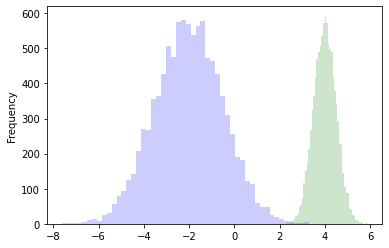

In [13]:
pd.Series(s2).plot(kind='hist', bins=50, color='g', alpha=0.2)
pd.Series(s3).plot(kind='hist', bins=50, color='b', alpha=0.2)
plt.savefig('twoHistograms.jpeg')

['.config', 'twoHistograms.jpeg', 'sample_data']


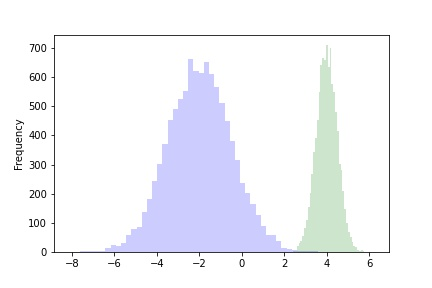

In [ ]:
import os
print (os.listdir(os.getcwd()))

from IPython.display import Image
Image('twoHistograms.jpeg')

### B. Barplots

This is as simple as passing `kind=bar` or `kind=barh` (for horiz bars) to `pd.plot`

#### One Variable (simple barplot)

0    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

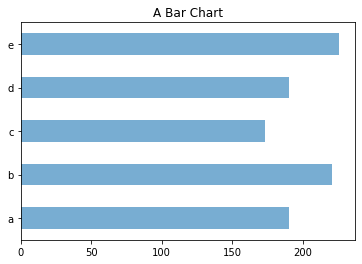

In [14]:
pd.Series(pd.cut(np.random.randint(1, 100, 1000), 5, labels=list('abcde'))
 .value_counts()
 .plot.barh(title='A Bar Chart',
          ylim=(0, 400),
          alpha=0.6))

In [15]:
pd.Series(pd.cut(np.random.randint(1, 100, 1000), 5, labels=list('abcde')).value_counts())

a    204
b    222
c    191
d    192
e    191
dtype: int64

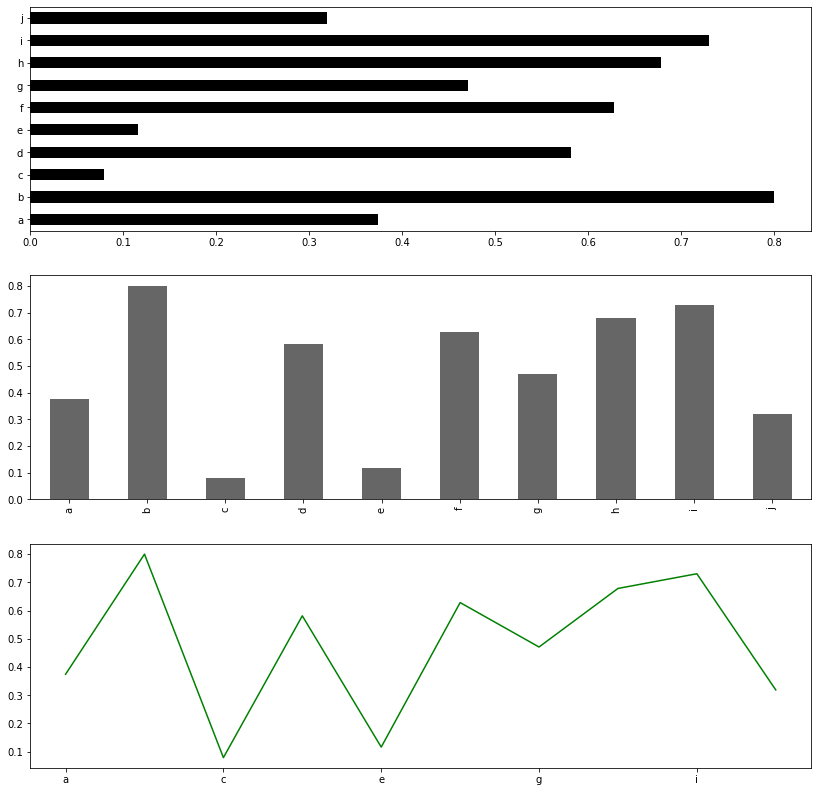

In [16]:
fig, axes = plt.subplots(3, 1, figsize=(14, 14))
s = pd.Series(np.random.rand(10), index=list('abcdefghij'))

s.plot(kind='bar', 
       ax=axes[1], 
       color='k', 
       alpha=0.6)

s.plot(kind='barh', 
       ax=axes[0], 
       color='k')

s.plot(
    ax=axes[2], 
    color='g')

### 2.2 Plotting the Dataframe

In [17]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Text(0, 0.5, 'Y Axis')

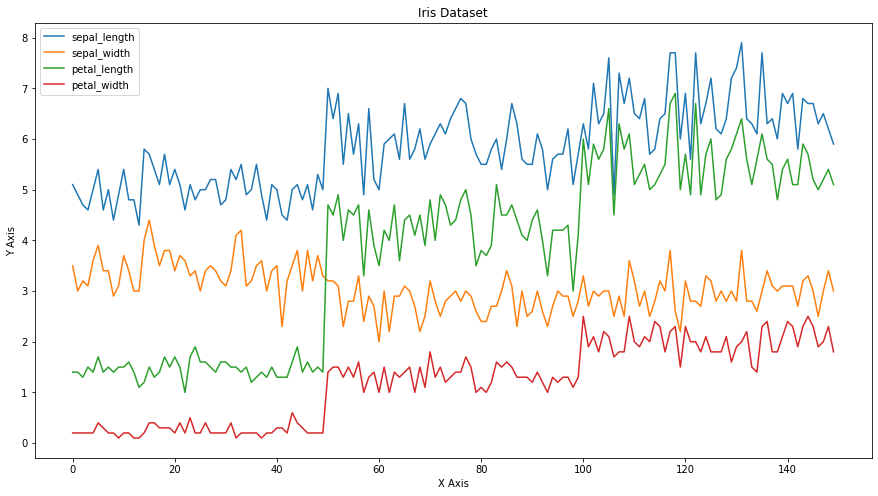

In [18]:
ax = iris.plot(figsize=(15,8), title='Iris Dataset')
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')

In [20]:
df = iris.drop(['species'], axis = 1)
df.iloc[0]

sepal_length    5.1
sepal_width     3.5
petal_length    1.4
petal_width     0.2
Name: 0, dtype: float64

## A. Barplots

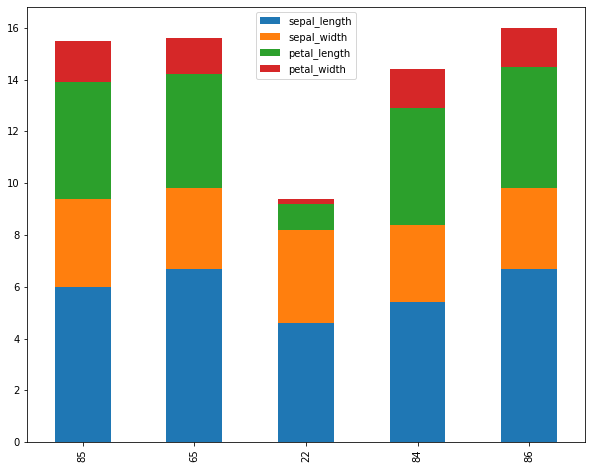

In [24]:
df.sample(5).plot(kind='bar', stacked=True, figsize=(10, 8))

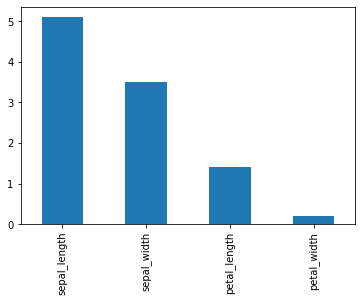

In [23]:
df.iloc[0].plot.bar()

In [25]:
data = pd.DataFrame(np.random.rand(5,5), index=list('ABCDE'), columns=list('PQRST'))
data

,P,Q,R,S,T
A,0.398034,0.697397,0.803304,0.077576,0.501027
B,0.201209,0.135255,0.709296,0.666112,0.118111
C,0.131537,0.699233,0.224410,0.816295,0.978222
D,0.805380,0.889600,0.548004,0.866854,0.604778
E,0.240433,0.211504,0.687566,0.068109,0.033364


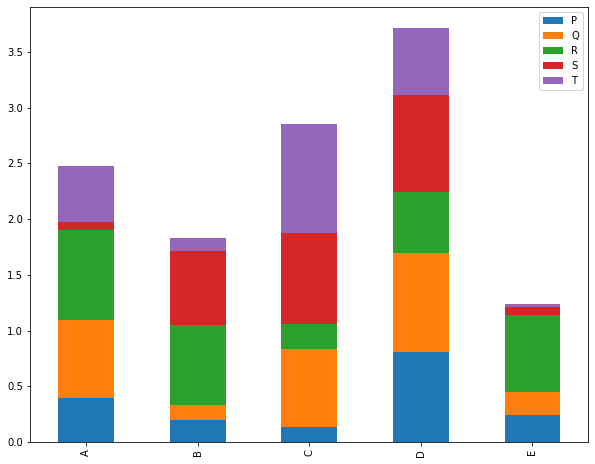

In [26]:
data.plot(kind='bar', stacked=True, figsize=(10, 8))
plt.savefig('stackedBarcharts.jpeg')

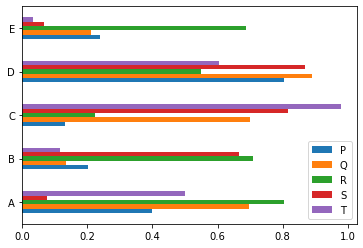

In [27]:
data.plot.barh()

### B. Histograms & Density Plots

* _Histograms_: Pass `kind='hist'` to `pd.plot()` or use the method `pd.hist()`
* _Density Plots_: Use `kind='kde'`


### Using the `.hist()` method

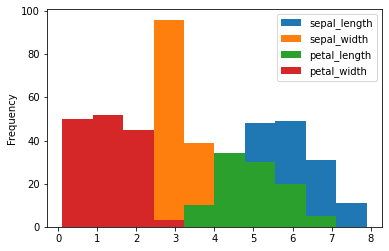

In [28]:
iris.plot.hist()

### Using the `.plot()` method

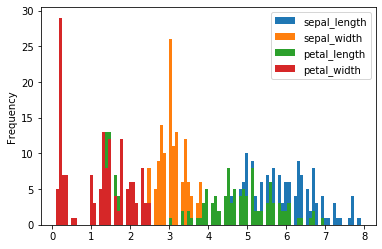

In [ ]:
iris.plot(kind = 'hist', stacked = False, bins = 100)

# C. Scatter Plots

- `.plot(kind='scatter')`
- `.scatter()`

In [29]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


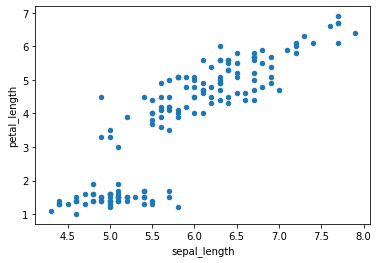

In [30]:
df.plot.scatter(x = 'sepal_length', y = 'petal_length')

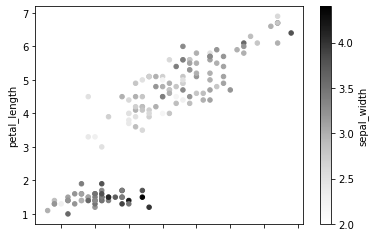

In [31]:
df.plot.scatter(x = 'sepal_length', y = 'petal_length', c = 'sepal_width')

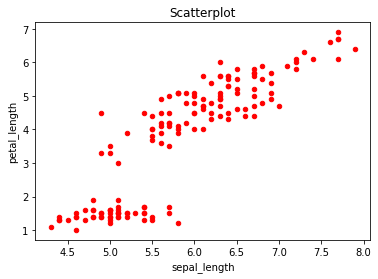

In [32]:
df.plot.scatter(x='sepal_length', y='petal_length', title = 'Scatterplot', color='r')

# D. Pie chart

In [33]:
d = df.iloc[0]
d

sepal_length    5.1
sepal_width     3.5
petal_length    1.4
petal_width     0.2
Name: 0, dtype: float64

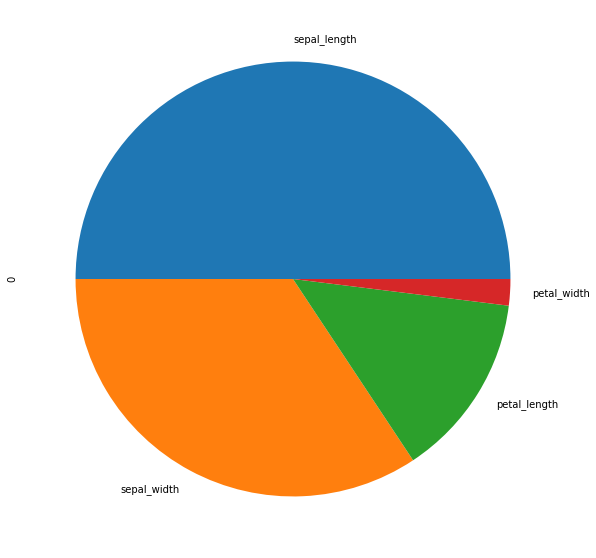

In [ ]:
d.plot.pie(figsize = (10,10))

In [ ]:
d = df.head(3).T
d

,0,1,2
sepal_length,5.1,4.9,4.7
sepal_width,3.5,3.0,3.2
petal_length,1.4,1.4,1.3
petal_width,0.2,0.2,0.2


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002AABC13BBE0>,
      dtype=object)

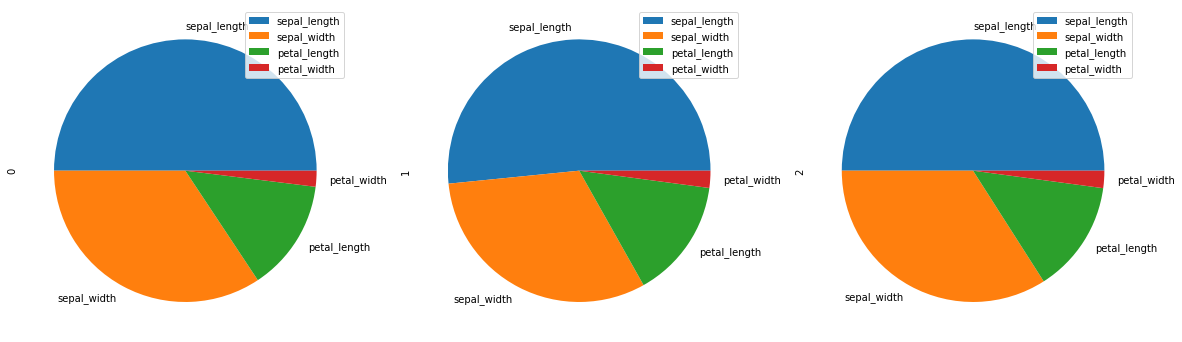

In [ ]:
d.plot.pie(subplots = True, figsize = (20, 20))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002AABBFCA198>,
      dtype=object)

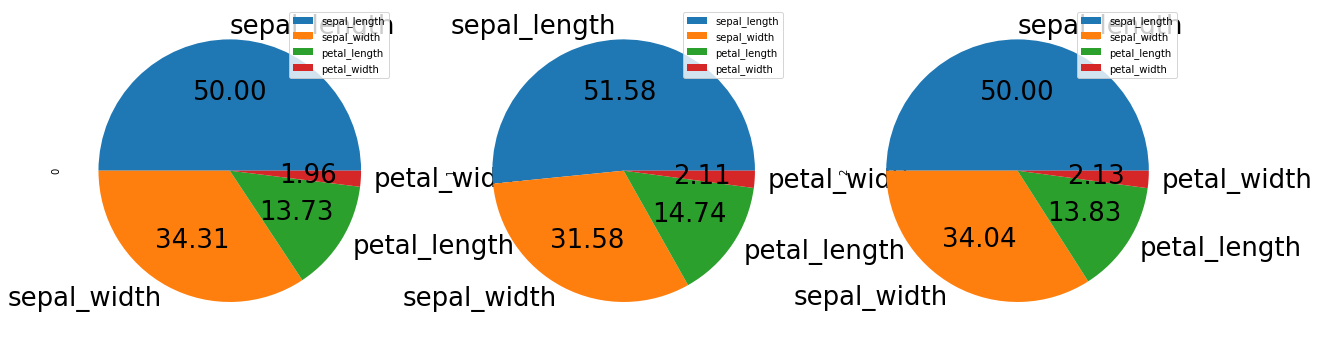

In [ ]:
d.plot.pie(subplots = True, figsize = (20, 20), fontsize = 26, autopct = '%.2f')

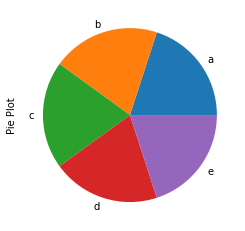

In [34]:
series = pd.Series([0.2]*5, index = ['a','b','c', 'd','e'], name = 'Pie Plot')
series.plot.pie()